In [1]:
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import matplotlib.pyplot as plt

In [2]:
timesteps = seq_length = 7
data_dim = 5

In [3]:
# Open, High, Low, Close, Volume
xy = np.loadtxt('data-02-stock_daily.csv', delimiter = ',')
xy = xy[::-1] # reverse order (chronically ordered)

In [4]:
# very important. It does not work without it.
scaler = MinMaxScaler(feature_range = (0, 1))
xy = scaler.fit_transform(xy)

In [5]:
x = xy
y = xy[:, [-1]] # Close as label

In [6]:
dataX = []
dataY = []

for i in range(0, len(y) - seq_length):
  _x = x[i:i + seq_length]
  _y = y[i + seq_length] # Next close price
  print(_x, '->', _y)
  dataX.append(_x)
  dataY.append(_y)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]] -> [0.12316526]
[[0.11044525 0.12724798 0.11435324 0.35107108 0.11089532]
 [0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]] -> [0.10022843]
[[0.12705592 0.1390988  0.12324434 0.23008873 0.11649107]
 [0.12288872 0.12276776 0.09067269 0.34481491 0.12791587]
 [0.14089803 0.17638508 0.15387945 0.4378686  0.18649648]
 [0.15782902 0.15470702 0.12791016 0.60962624 0.12692483]
 [0.1207904  0.11770961 0.11162416 0.22934481 0.10512477]
 [0.09905103 0.11924158 0.11722888 0.21129336 0.12316526]
 [0.11405885 0.10952968 0.11353161 0.18323922 0.10022843]] -

In [7]:
# split to train and testing
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])
print(trainX.shape, trainY.shape)

(507, 7, 5) (507, 1)


In [8]:
model = Sequential()
model.add(LSTM(1, input_shape = (seq_length, data_dim), return_sequences = False))
model.add(Activation('linear'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1)                 28        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [11]:
model.fit(trainX, trainY, epochs = 200)

Epoch 1/200
16/16 [==============================] - 10s 4ms/step - loss: 0.2975
Epoch 2/200
16/16 [==============================] - 0s 5ms/step - loss: 0.2605
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2295
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.2026
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1807
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1619
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1461
Epoch 8/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1315
Epoch 9/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1184
Epoch 10/200
16/16 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 11/200
16/16 [==============================] - 0s 5ms/step - loss: 0.0941
Epoch 12/200
16/16 [==============================] - 0s 4ms/step - loss: 0.0824
Epoch 13/200
16/16 [================

7/7 [==============================] - 0s 2ms/step


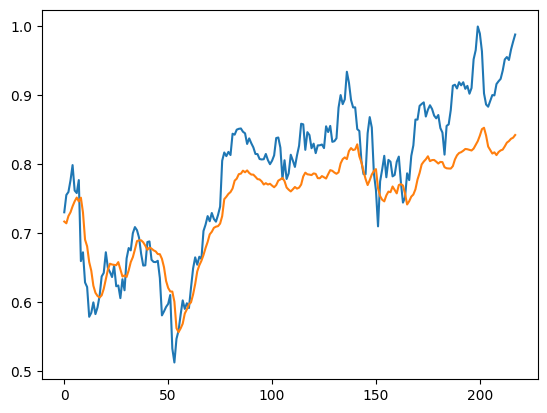

In [12]:
# make predictions
testPredict = model.predict(testX)

plt.plot(testY)
plt.plot(testPredict)
plt.show()